In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorboard
import seaborn as sns

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [15]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
109,1,0,0,4,2,0,114.2,198.9,68.4,58.7,...,120,5,3.46,3.19,8.4,97,5000,19,24,12440.0
122,1,0,0,3,1,0,93.7,167.3,63.8,50.8,...,98,1,2.97,3.23,9.4,68,5500,31,38,7609.0
168,1,0,1,1,2,0,98.4,176.2,65.6,52.0,...,146,5,3.62,3.50,9.3,116,4800,24,30,9639.0
78,1,0,1,2,1,0,93.7,157.3,64.4,50.8,...,92,1,2.97,3.23,9.4,68,5500,31,38,6669.0
157,1,0,0,2,1,0,95.7,166.3,64.4,52.8,...,98,1,3.19,3.03,9.0,70,4800,30,37,7198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,0,0,3,1,0,98.8,177.8,66.5,55.5,...,122,1,3.39,3.39,8.6,84,4800,26,32,8495.0
142,1,0,0,3,1,0,97.2,172.0,65.4,52.5,...,108,1,3.62,2.64,9.5,82,4400,28,33,7775.0
81,1,0,1,2,1,0,96.3,173.0,65.4,49.4,...,122,1,3.35,3.46,8.5,88,5000,25,32,8499.0
123,1,0,0,4,1,0,103.3,174.6,64.6,59.8,...,122,1,3.35,3.46,8.5,88,5000,24,30,8921.0


In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
df.drop(["car_ID", "symboling", "CarName"], axis=1, inplace=True)

In [9]:
import sklearn
labelencoder = sklearn.preprocessing.LabelEncoder()
df['fueltype'] = labelencoder.fit_transform(df['fueltype'])
df['aspiration'] = labelencoder.fit_transform(df['aspiration'])
df['carbody'] = labelencoder.fit_transform(df['carbody'])
df['drivewheel'] = labelencoder.fit_transform(df['drivewheel'])
df['enginelocation'] = labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem'] = labelencoder.fit_transform(df['fuelsystem'])
df['doornumber'] = labelencoder.fit_transform(df['doornumber'])
df['enginetype'] = labelencoder.fit_transform(df['enginetype'])
df['cylindernumber'] = labelencoder.fit_transform(df['cylindernumber'])

In [10]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df = df.sample(frac=1)

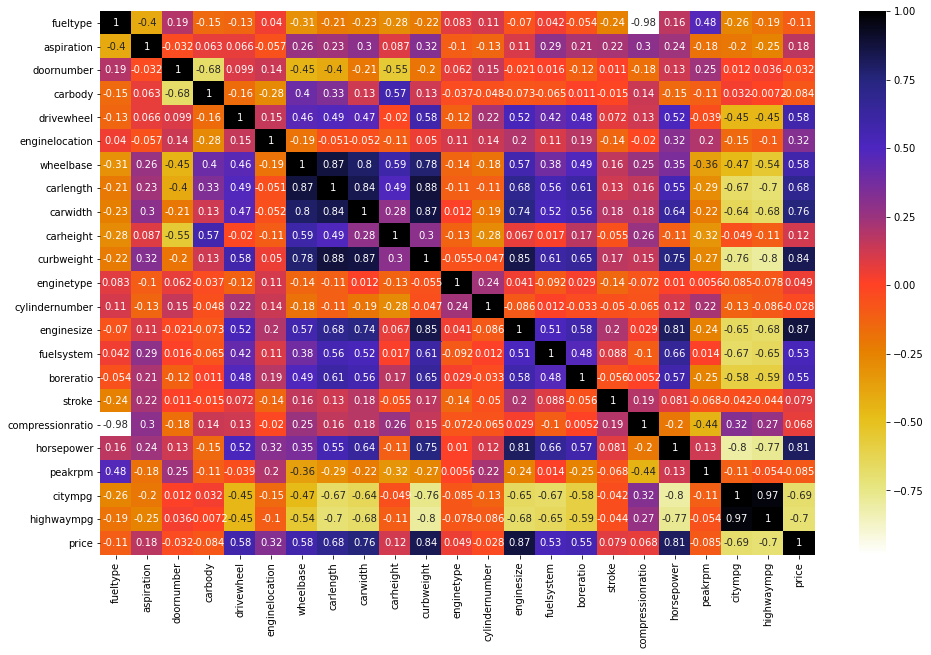

In [13]:
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot=True)
plt.show()

In [14]:
df.shape

(205, 23)

In [16]:
train_data = df.iloc[:144,:]
train_data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
109,1,0,0,4,2,0,114.2,198.9,68.4,58.7,...,120,5,3.46,3.190,8.4,97,5000,19,24,12440.0
122,1,0,0,3,1,0,93.7,167.3,63.8,50.8,...,98,1,2.97,3.230,9.4,68,5500,31,38,7609.0
168,1,0,1,1,2,0,98.4,176.2,65.6,52.0,...,146,5,3.62,3.500,9.3,116,4800,24,30,9639.0
78,1,0,1,2,1,0,93.7,157.3,64.4,50.8,...,92,1,2.97,3.230,9.4,68,5500,31,38,6669.0
157,1,0,0,2,1,0,95.7,166.3,64.4,52.8,...,98,1,3.19,3.030,9.0,70,4800,30,37,7198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,0,1,1,2,0,112.0,199.2,72.0,55.4,...,304,5,3.80,3.350,8.0,184,4500,14,16,45400.0
19,1,0,1,2,1,0,94.5,155.9,63.6,52.0,...,90,1,3.03,3.110,9.6,70,5400,38,43,6295.0
105,1,1,1,2,2,0,91.3,170.7,67.9,49.7,...,181,5,3.43,3.270,7.8,200,5200,17,23,19699.0
95,1,0,1,2,1,0,94.5,165.6,63.8,53.3,...,97,1,3.15,3.290,9.4,69,5200,31,37,7799.0


In [17]:
test_data = df.iloc[145:,:]
test_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
34,1,0,1,2,1,0,93.7,150.0,64.0,52.6,...,92,0,2.91,3.41,9.2,76,6000,30,34,7129.0
15,1,0,0,3,2,0,103.5,189.0,66.9,55.7,...,209,5,3.62,3.39,8.0,182,5400,16,22,30760.0
107,1,0,0,3,2,0,107.9,186.7,68.4,56.7,...,120,5,3.46,3.19,8.4,97,5000,19,24,11900.0
61,1,0,1,2,1,0,98.8,177.8,66.5,53.7,...,122,1,3.39,3.39,8.6,84,4800,26,32,10595.0


In [18]:
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('price')
test_labels = test_data.pop('price')

In [19]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fueltype,144.0,0.888889,0.315367,0.00,1.0000,1.00,1.0000,1.00
aspiration,144.0,0.166667,0.373979,0.00,0.0000,0.00,0.0000,1.00
doornumber,144.0,0.458333,0.500000,0.00,0.0000,0.00,1.0000,1.00
carbody,144.0,2.569444,0.866250,0.00,2.0000,3.00,3.0000,4.00
drivewheel,144.0,1.312500,0.560578,0.00,1.0000,1.00,2.0000,2.00
enginelocation,144.0,0.013889,0.117438,0.00,0.0000,0.00,0.0000,1.00
wheelbase,144.0,98.516667,6.015632,86.60,94.5000,96.55,101.2000,120.90
carlength,144.0,173.761806,12.256592,141.10,166.3000,172.50,180.2250,208.10
carwidth,144.0,65.852083,2.129906,60.30,64.2000,65.50,66.5000,72.00
carheight,144.0,53.649306,2.441483,47.80,51.6000,54.10,55.5000,59.80


In [20]:
train_mean = np.mean(train_data, axis=0)
train_std = np.std(train_data, axis=0)
train_data = (train_data-train_mean) / train_std
test_data = (test_data-train_mean) / train_std

In [21]:
train_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
109,0.353553,-0.447214,-0.919866,1.657200,1.230692,-0.118678,2.616196,2.058153,1.200433,2.075920,...,-0.180045,-0.153878,0.873394,0.554440,-0.220250,-0.465570,-0.143346,-0.214068,-0.965171,-0.994344
122,0.353553,-0.447214,-0.919866,0.498769,-0.559406,-0.118678,-0.803486,-0.529051,-0.966825,-1.171112,...,-0.180045,-0.654890,-1.146987,-1.296142,-0.086709,-0.230434,-0.908835,0.875184,0.797848,0.942465
168,0.353553,-0.447214,1.087115,-1.818093,1.230692,-0.118678,-0.019462,0.199624,-0.118767,-0.677892,...,-0.180045,0.438228,0.873394,1.158712,0.814692,-0.253947,0.358182,-0.649770,-0.230580,-0.164283
78,0.353553,-0.447214,1.087115,-0.659662,-0.559406,-0.118678,-0.803486,-1.347786,-0.684139,-1.171112,...,-0.180045,-0.791530,-1.146987,-1.296142,-0.086709,-0.230434,-0.908835,0.875184,0.797848,0.942465
157,0.353553,-0.447214,-0.919866,-0.659662,-0.559406,-0.118678,-0.469859,-0.610924,-0.684139,-0.349079,...,-0.180045,-0.654890,-1.146987,-0.465268,-0.754413,-0.324488,-0.856043,-0.649770,0.650930,0.804121


In [22]:
model = tf.keras.models.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                230       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 379
Trainable params: 379
Non-trainable params: 0
__________________________________________________________

In [23]:
history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [24]:
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,224360448.0,224360464.0,12868.691406,303337440.0,303337440.0,14454.177734,95
96,224358080.0,224358080.0,12868.608398,303336704.0,303336704.0,14454.148438,96
97,224358352.0,224358352.0,12868.625000,303335968.0,303335968.0,14454.122070,97
98,224358400.0,224358400.0,12868.605469,303335232.0,303335232.0,14454.093750,98
99,224357712.0,224357712.0,12868.564453,303334496.0,303334496.0,14454.066406,99


In [25]:
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [26]:
test_score = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 2ms/step - loss: 241012160.0000 - mse: 241012160.0000 - mae: 13551.9971
